In [1]:
##importing  required libraries
import numpy as np
import pandas as pd
import seaborn as sns


# EDA

In [2]:
# Loading data
loan_data = pd.read_excel('loan.xlsx')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# data understanding
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: datetime64[ns](5), float64(76), int64(13), object(17)
memory usage: 33.6+ MB


In [4]:

# Check the number of data points in the data set
print(len(loan_data))
# Check the number of features in the data set
print(len(loan_data.columns))
# Check the data types
print(loan_data.dtypes.unique())

39717
111
[dtype('int64') dtype('float64') dtype('O') dtype('<M8[ns]')]


In [7]:
# To get columns information
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:

# Dropping all columns with only null values
loan_data_new=loan_data.dropna(axis=1,how='all')
loan_data.shape

(39717, 111)

In [9]:
#Remove columns with only one unique values
loan_data_new= loan_data_new.loc[:,loan_data_new.nunique()!=1]
loan_data_new.shape

(39717, 48)

In [10]:
# Drop columns with more than 50% null values
loan_data_new=loan_data_new.loc[:,round(loan_data_new.isnull().sum()/len(loan_data_new)*100,2)<50]
loan_data_new.shape

(39717, 45)

In [11]:
loan_data_new.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [12]:
drop_columns=['id','member_id','loan_amnt','funded_amnt_inv','emp_title','earliest_cr_line','url','total_acc','open_acc','desc','title','zip_code','issue_d','sub_grade','last_credit_pull_d','last_pymnt_d']
loan_data_new=loan_data_new.drop(drop_columns,axis=1)
loan_data_new.dtypes

drop_columns1=['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']
loan_data_new=loan_data_new.drop(drop_columns1,axis=1)

In [13]:
# As we only want to find out potential defaults, we should remove 'current' from loan status
loan_data_new=loan_data_new[loan_data_new.loan_status !='Current']
loan_data_new=loan_data_new.loc[:,loan_data_new.nunique()!=1]

In [14]:
loan_data_new.dtypes

funded_amnt               int64
term                     object
int_rate                float64
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
pub_rec_bankruptcies    float64
dtype: object

In [29]:
from datetime import datetime, timedelta

In [36]:


# Creating a profit and loss column
loan_data_new['PnL']=round((loan_data_new['total_pymnt']-loan_data_new['funded_amnt'])*100/loan_data_new['funded_amnt'],2)

# Creating a column whihc is ratio of funded amount and annual income
loan_data_new['loan_inc_ratio']=round(loan_data_new.funded_amnt*100/loan_data_new.annual_inc,0)

print(loan_data_new.groupby(['grade'])['PnL'].median())
print(loan_data_new[(loan_data_new['inq_last_6mths']<3)].groupby('grade')['PnL'].median())
print(loan_data_new[(loan_data_new['grade']!='G')|(loan_data_new['home_ownership']!='OWN')].groupby('grade')['PnL'].median())
print(loan_data_new[(loan_data_new['grade']!='G')|(loan_data_new['home_ownership']!='OWN')].groupby('grade')['PnL'].median())
print(loan_data_new[(loan_data_new['grade']!='G')|(loan_data_new['purpose']!='medical')].groupby('grade')['PnL'].median())
print(loan_data_new[(loan_data_new['grade']!='G')|(loan_data_new['purpose']!='renewable_energy')].groupby('grade')['PnL'].median())
print(loan_data_new[(loan_data_new['grade']!='G')|(loan_data_new['purpose']!='small_business')].groupby('grade')['PnL'].median())
print(loan_data_new[(loan_data_new['grade']!='G')|((loan_data_new['home_ownership']!='OWN')&(~loan_data_new['purpose'].isin(['small_business','medical','renewable_energy'])))].groupby('grade')['PnL'].median())
#loan_data_new[(loan_data_new['grade']=='G')&(loan_data_new['emp_length']=='na')][['grade','emp_length']]
#loan_data_new.groupby(['emp_length','grade'])['term'].count()
print(loan_data_new[(loan_data_new['grade']=='G')&(loan_data_new['emp_length']=='< 1 year')]['purpose'].value_counts())

grade
A    10.28
B    16.16
C    20.61
D    23.23
E    26.56
F    28.34
G    29.24
Name: PnL, dtype: float64
grade
A    10.28
B    16.22
C    20.63
D    23.50
E    26.57
F    28.38
G    31.38
Name: PnL, dtype: float64
grade
A    10.280
B    16.160
C    20.610
D    23.230
E    26.560
F    28.340
G    29.825
Name: PnL, dtype: float64
grade
A    10.280
B    16.160
C    20.610
D    23.230
E    26.560
F    28.340
G    29.825
Name: PnL, dtype: float64
grade
A    10.28
B    16.16
C    20.61
D    23.23
E    26.56
F    28.34
G    29.71
Name: PnL, dtype: float64
grade
A    10.28
B    16.16
C    20.61
D    23.23
E    26.56
F    28.34
G    29.64
Name: PnL, dtype: float64
grade
A    10.280
B    16.160
C    20.610
D    23.230
E    26.560
F    28.340
G    31.405
Name: PnL, dtype: float64
grade
A    10.28
B    16.16
C    20.61
D    23.23
E    26.56
F    28.34
G    33.45
Name: PnL, dtype: float64
debt_consolidation    17
credit_card            6
small_business         6
car                    1
moving 

In [37]:
print("% of data points left",round(loan_data_new.size/loan_data.size*100,2))
print("% defaults in the remaining data set:",round(sum(loan_data_new.loan_status=='Charged Off')*100/len(loan_data_new),1))

% of data points left 21.0
% defaults in the remaining data set: 14.6


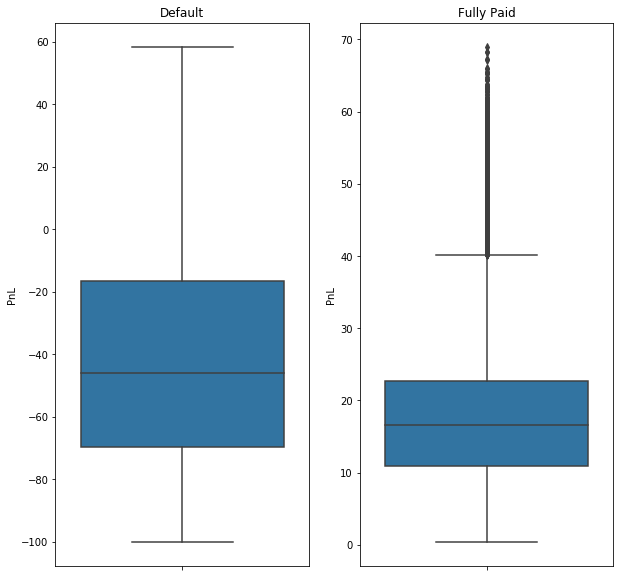

In [40]:
import matplotlib.pyplot as plt
#Relationship of Funded Amount with defaults
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=loan_data_new[loan_data_new.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=loan_data_new[loan_data_new.loan_status=='Fully Paid'].PnL)
plt.show()

C:\Users\nn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


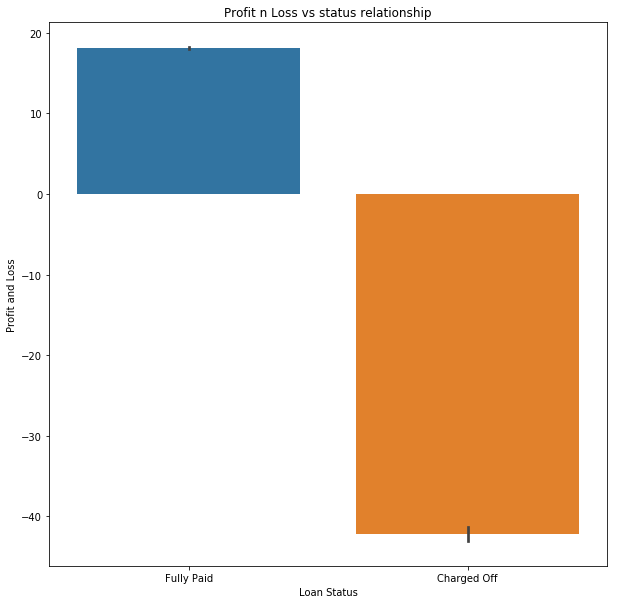

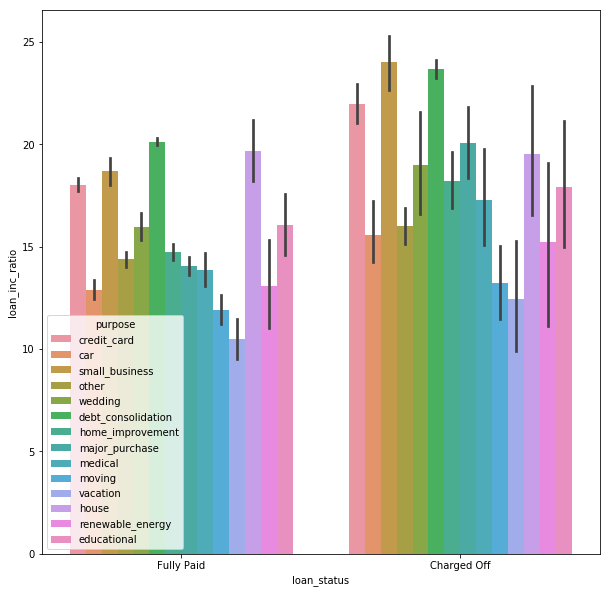

In [41]:
# Relationship of default with funded amount with a barplot
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='PnL',data=loan_data_new)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()


plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=loan_data_new)

plt.show()

C:\Users\nn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


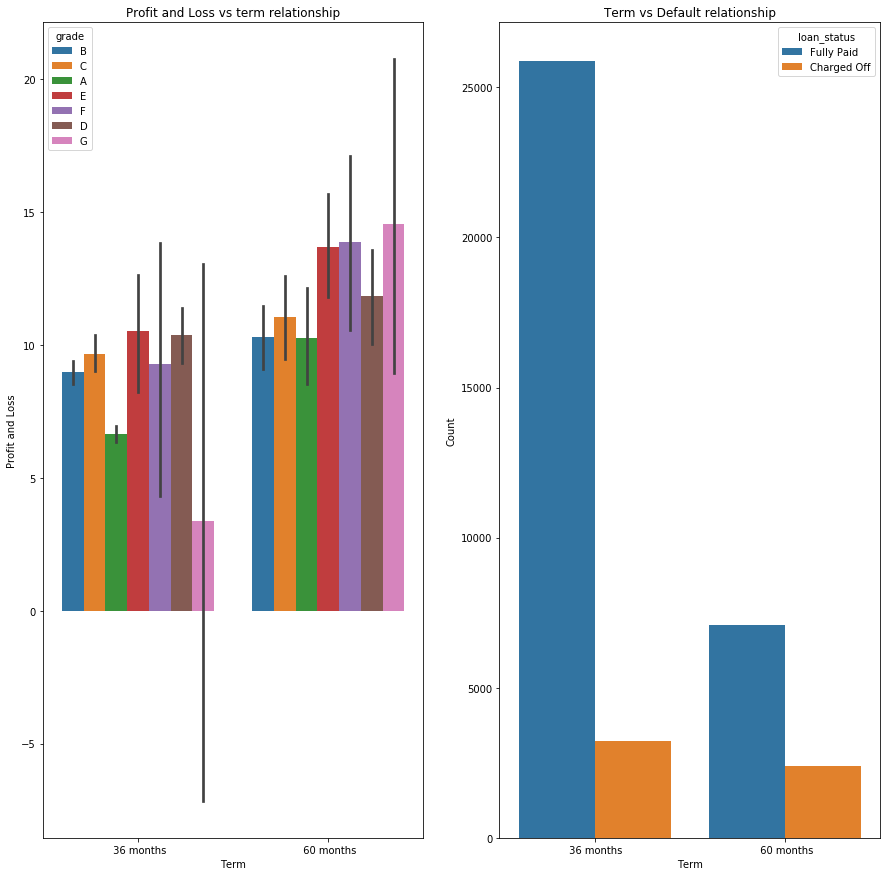

In [42]:
# Relationship of default with term with a barplot
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
sns.barplot(x='term',y='PnL',data=loan_data_new,hue='grade')
plt.xlabel("Term")
plt.ylabel("Profit and Loss")

plt.title("Profit and Loss vs term relationship")


plt.subplot(1,2,2)
sns.countplot('term',hue='loan_status',data=loan_data_new)
plt.xlabel("Term")
plt.ylabel("Count")
plt.title("Term vs Default relationship")
plt.show()

C:\Users\nn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


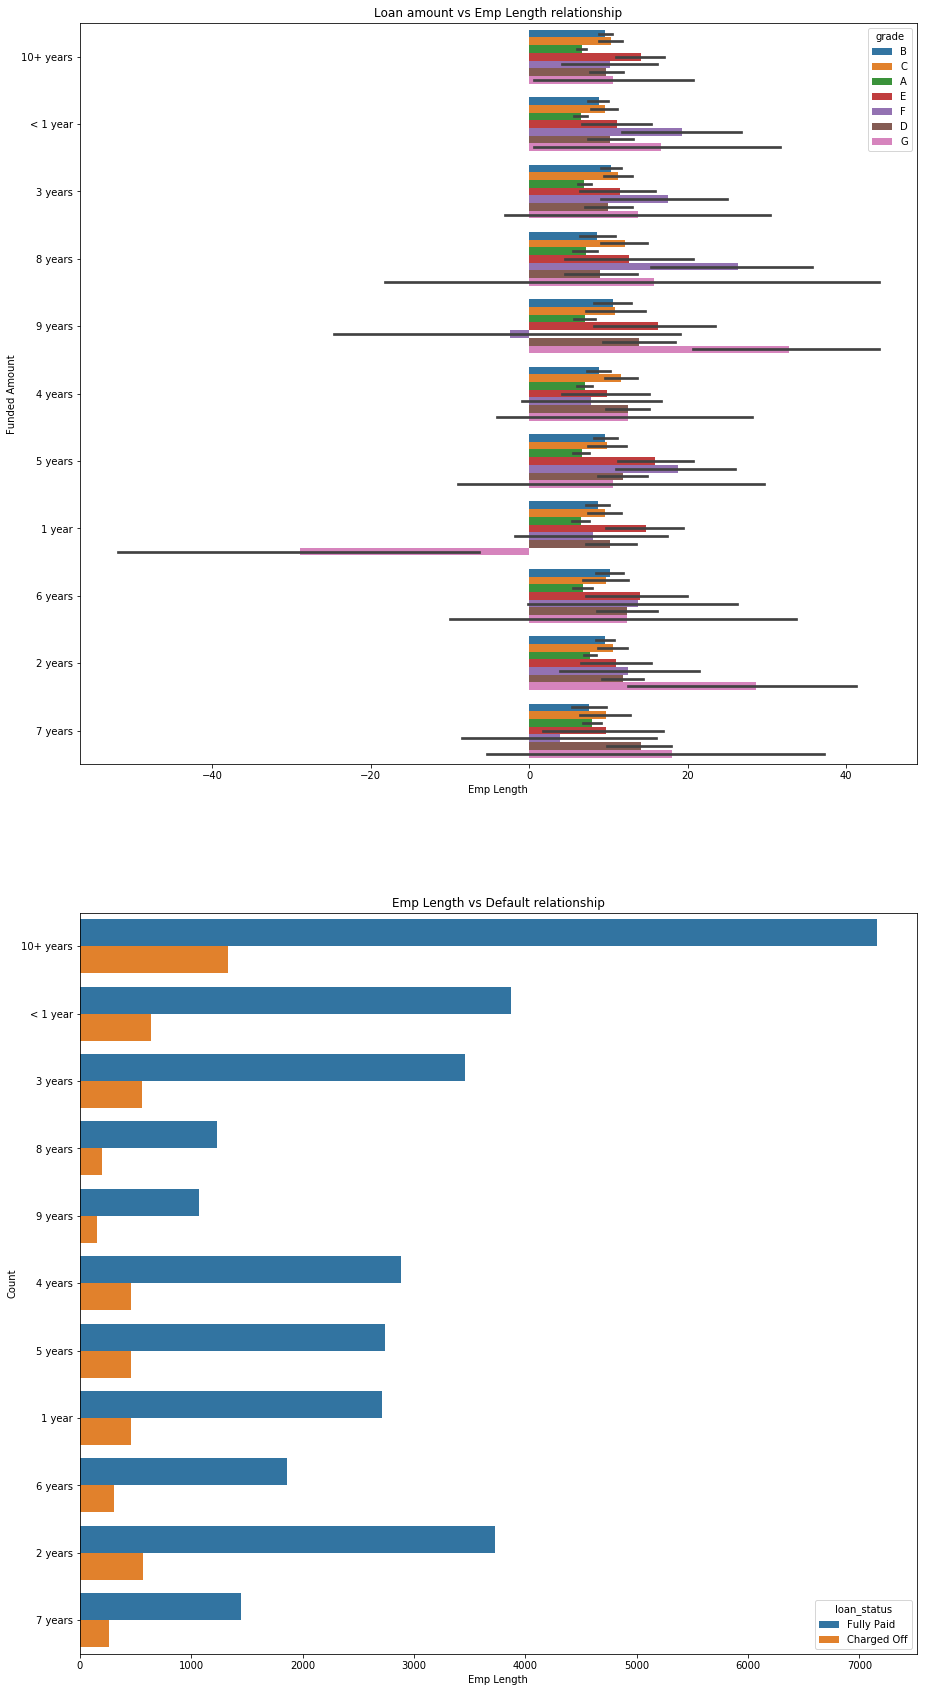

In [43]:
# Relationship of default with term with a barplot
plt.figure(figsize=(15,30))

plt.subplot(2,1,1)
sns.barplot(y='emp_length',x='PnL',data=loan_data_new,hue='grade')
plt.xlabel("Emp Length")
plt.ylabel("Funded Amount")

plt.title("Loan amount vs Emp Length relationship")


plt.subplot(2,1,2)
sns.countplot(y='emp_length',hue='loan_status',data=loan_data_new)
plt.xlabel("Emp Length")
plt.ylabel("Count")
plt.title("Emp Length vs Default relationship")
plt.show()

C:\Users\nn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


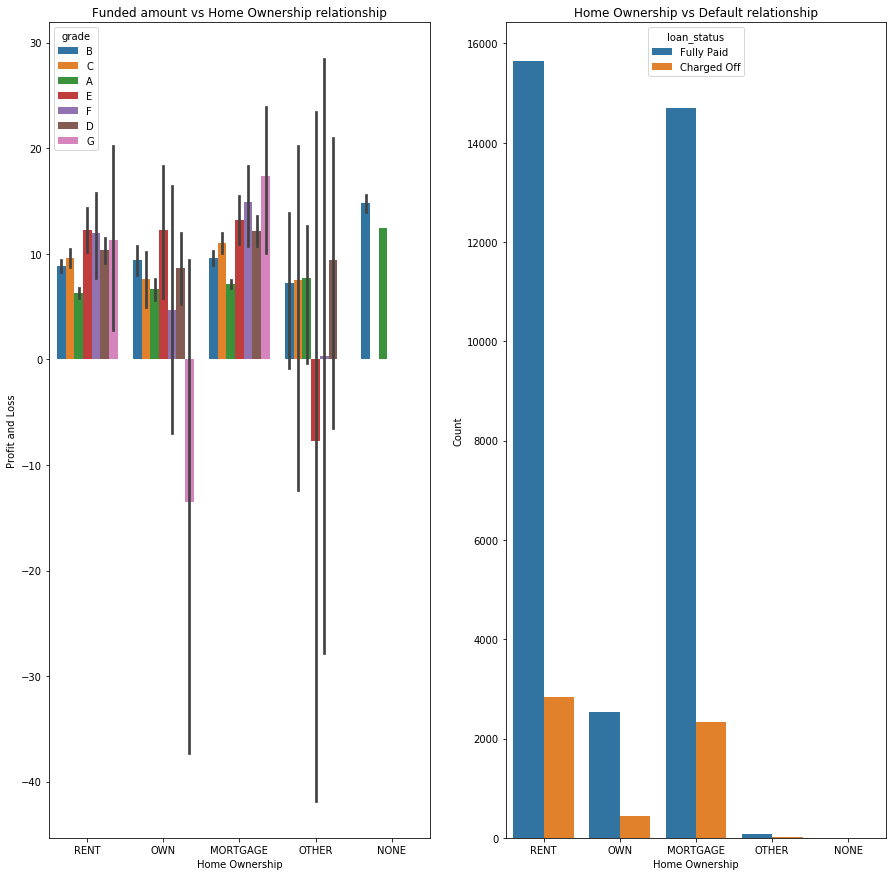

In [44]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
sns.barplot(x='home_ownership',y='PnL',data=loan_data_new,hue='grade')
plt.xlabel("Home Ownership")
plt.ylabel("Profit and Loss")

plt.title("Funded amount vs Home Ownership relationship")


plt.subplot(1,2,2)
sns.countplot(x='home_ownership',hue='loan_status',data=loan_data_new)
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.title("Home Ownership vs Default relationship")
plt.show()

C:\Users\nn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


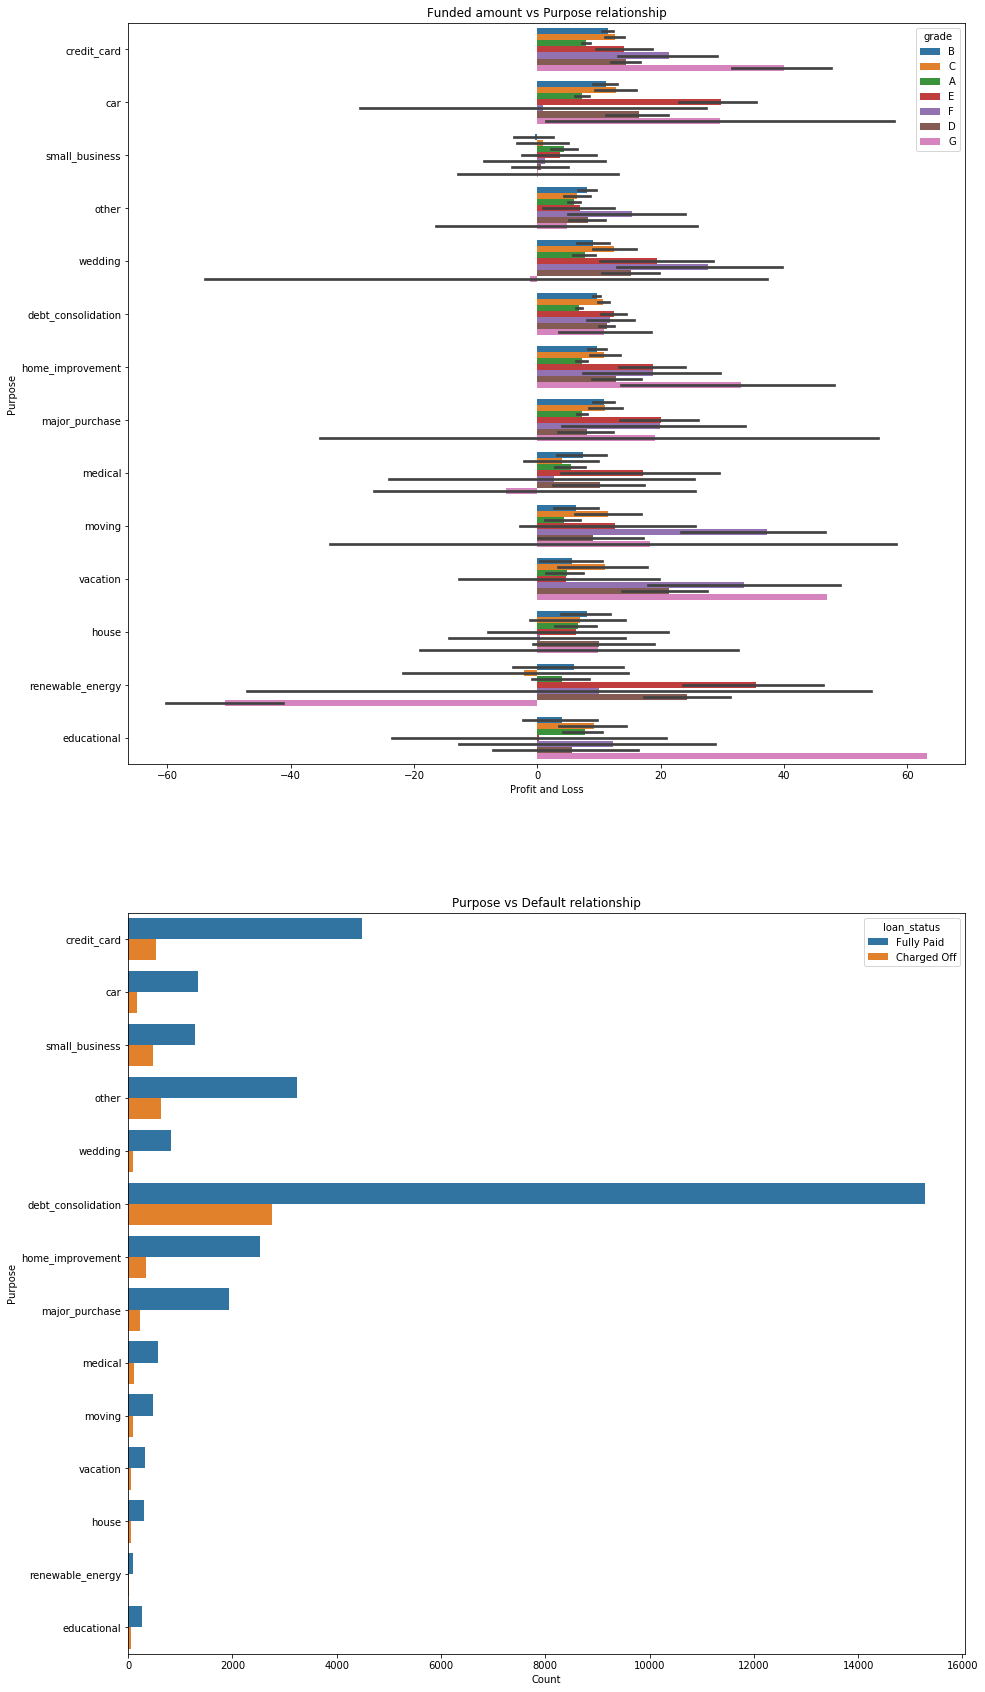

In [45]:
plt.figure(figsize=(15,30))

plt.subplot(2,1,1)
sns.barplot(y='purpose',x='PnL',data=loan_data_new,hue='grade')
plt.ylabel("Purpose")
plt.xlabel("Profit and Loss")

plt.title("Funded amount vs Purpose relationship")


plt.subplot(2,1,2)
sns.countplot(y='purpose',hue='loan_status',data=loan_data_new)
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Default relationship")
plt.show()

C:\Users\nn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


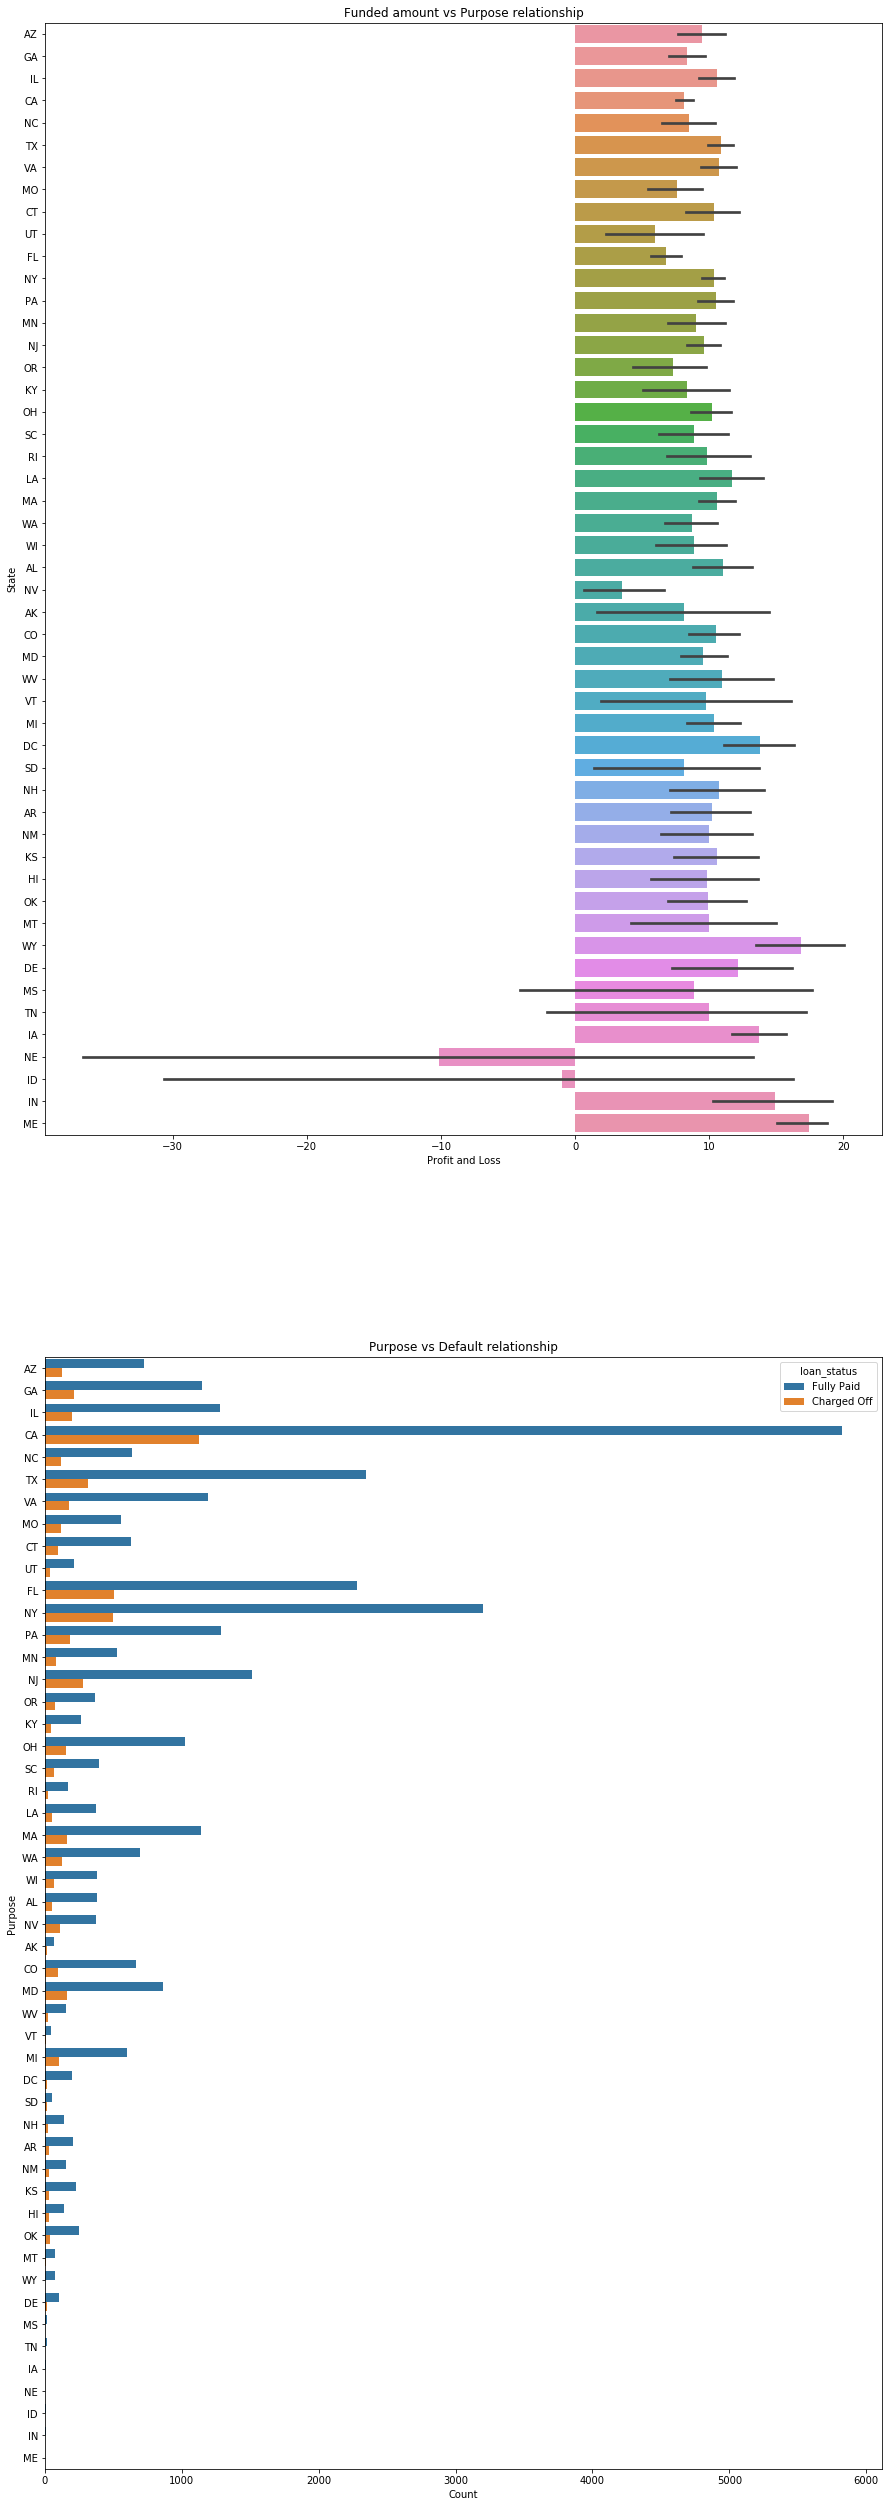

In [46]:
plt.figure(figsize=(15,45))

plt.subplot(2,1,1)
sns.barplot(y='addr_state',x='PnL',data=loan_data_new)
plt.ylabel("State")
plt.xlabel("Profit and Loss")

plt.title("Funded amount vs Purpose relationship")


plt.subplot(2,1,2)
sns.countplot(y='addr_state',hue='loan_status',data=loan_data_new)
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Default relationship")
plt.show()

C:\Users\nn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


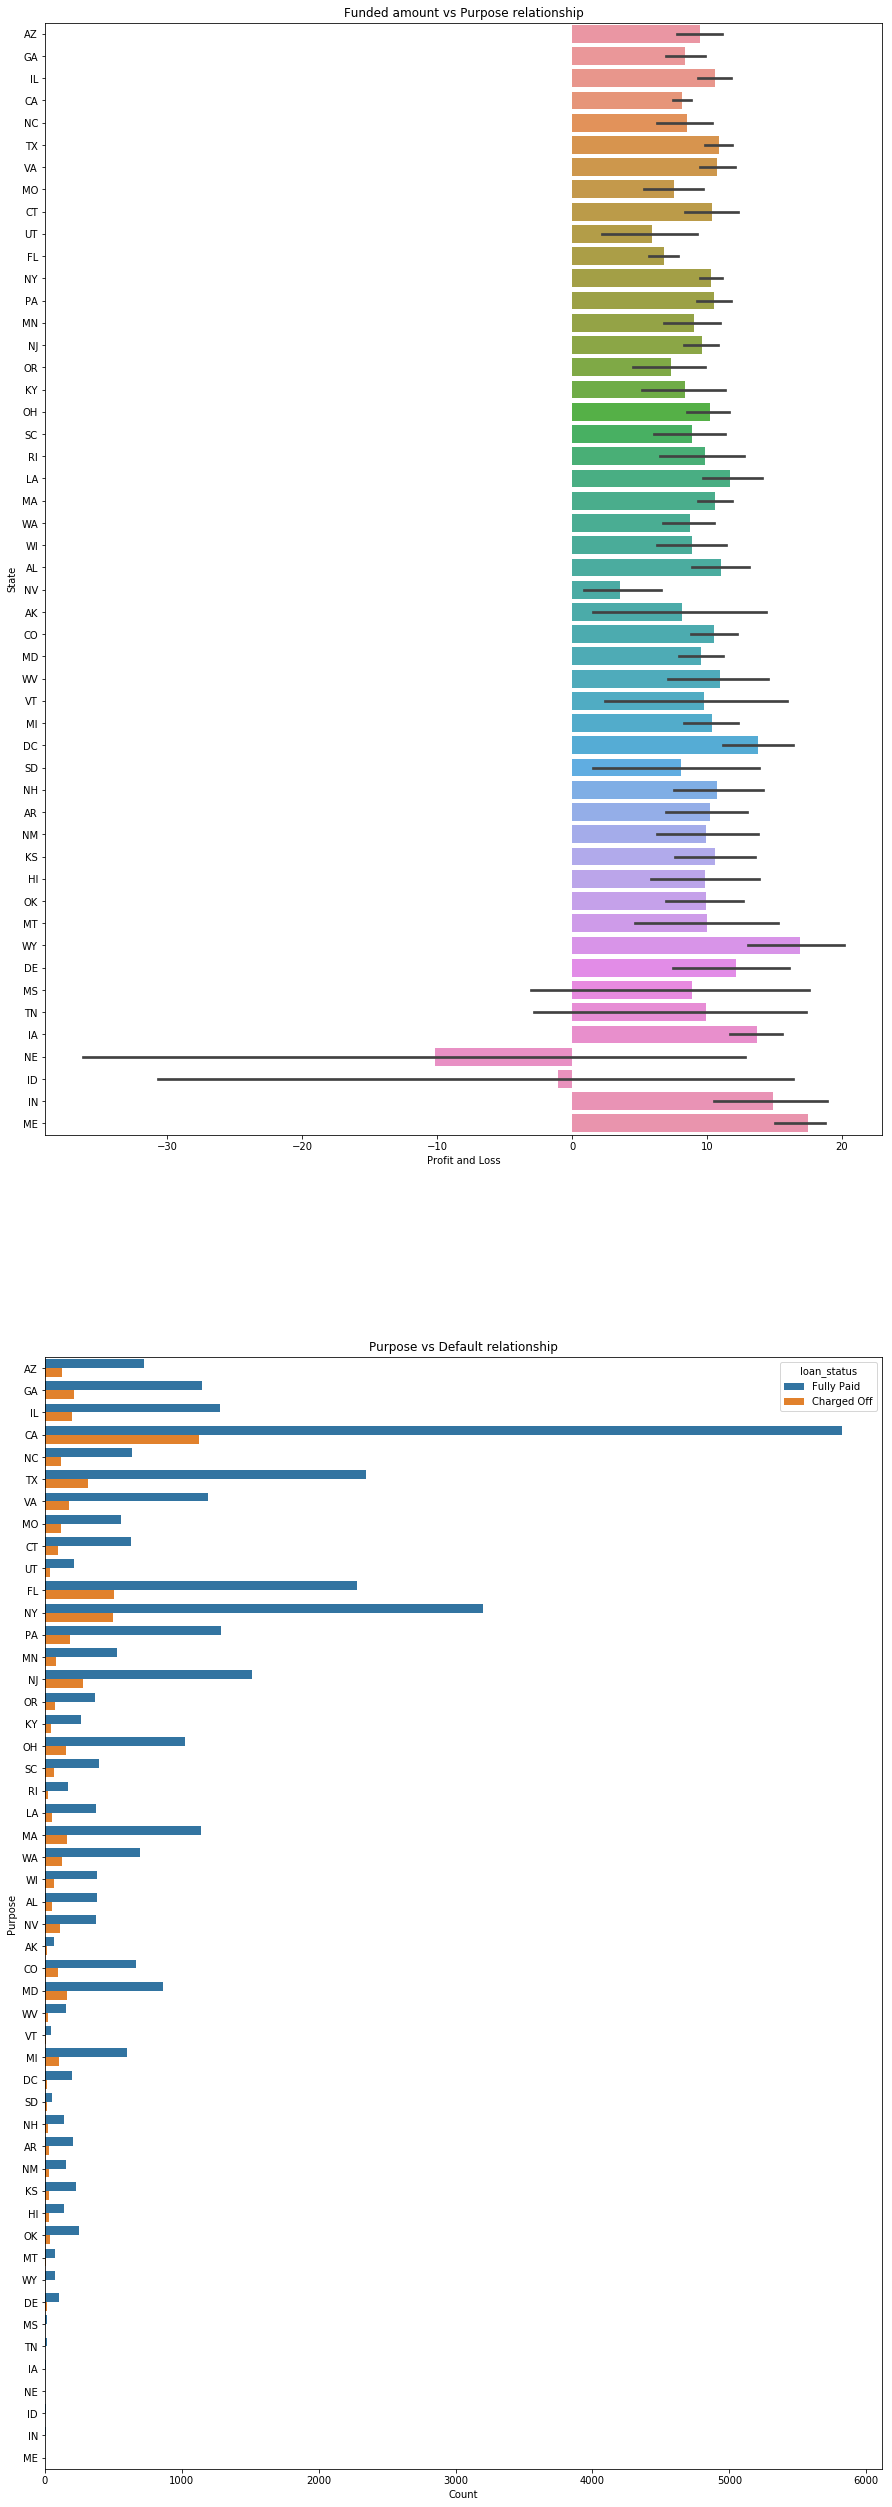

In [47]:
plt.figure(figsize=(15,45))

plt.subplot(2,1,1)
sns.barplot(y='addr_state',x='PnL',data=loan_data_new)
plt.ylabel("State")
plt.xlabel("Profit and Loss")

plt.title("Funded amount vs Purpose relationship")


plt.subplot(2,1,2)
sns.countplot(y='addr_state',hue='loan_status',data=loan_data_new)
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Default relationship")
plt.show()

<Figure size 1080x1080 with 0 Axes>

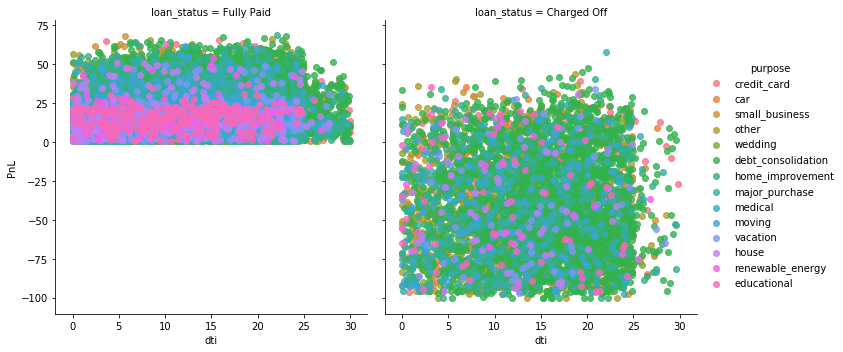

<Figure size 1080x1080 with 0 Axes>

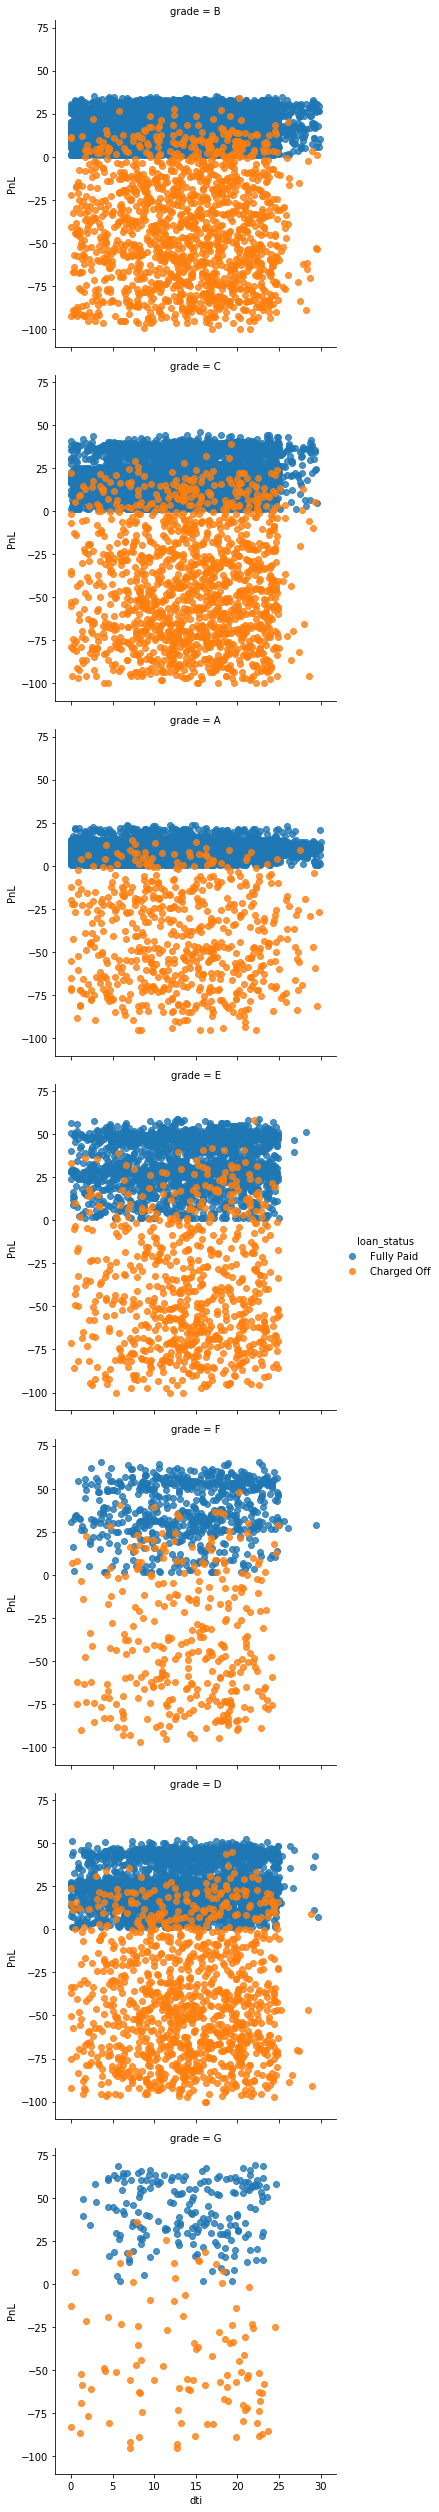

<Figure size 1080x1080 with 0 Axes>

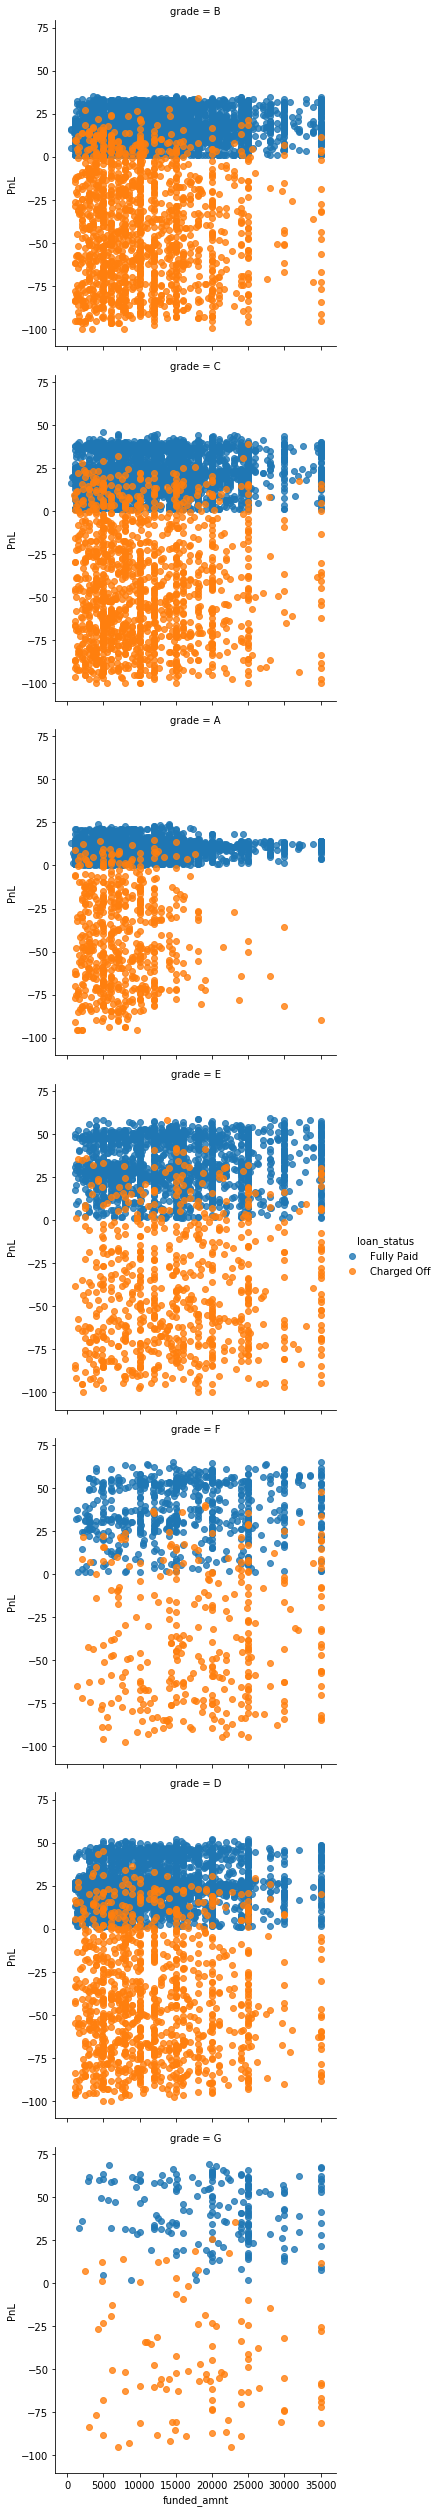

<Figure size 1080x1080 with 0 Axes>

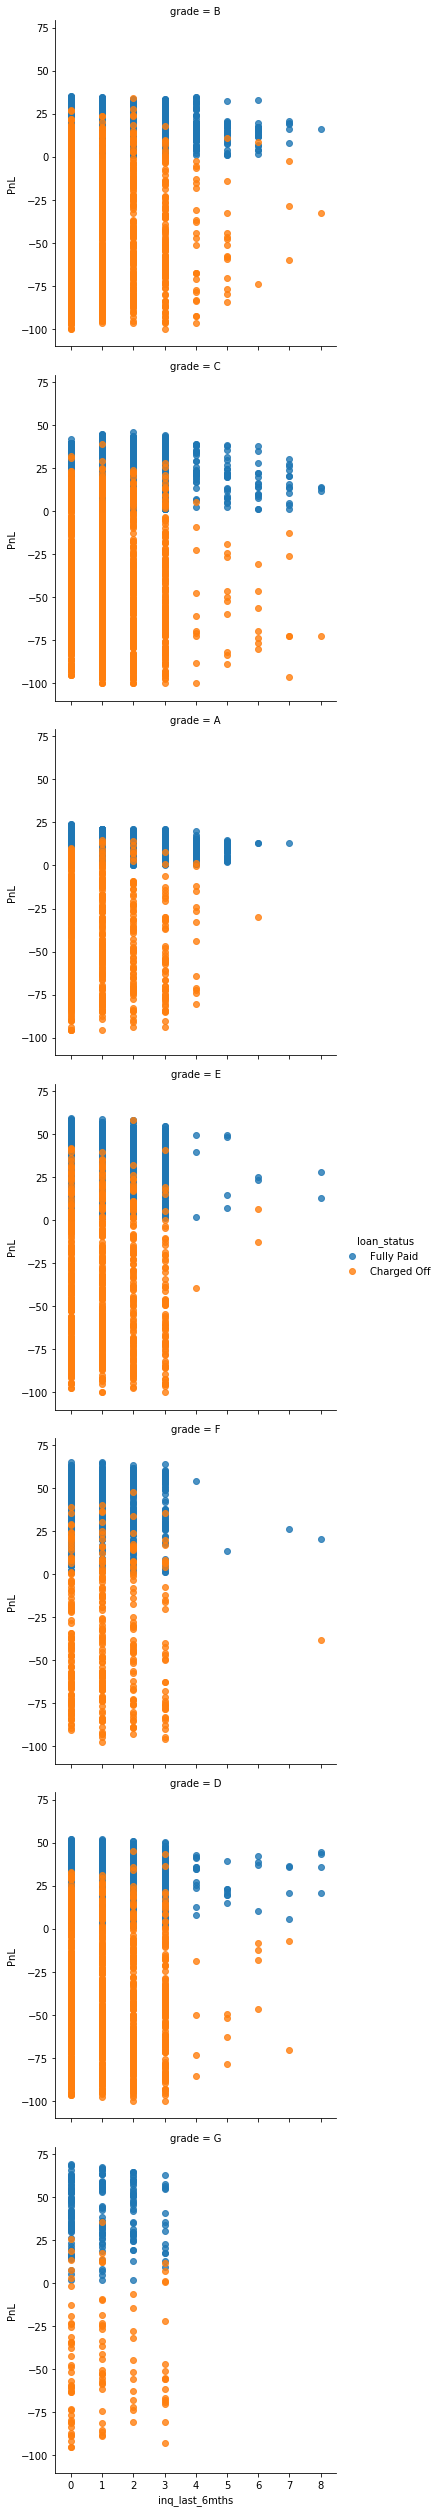

In [49]:

# Trying to see influence of loan amount and DTI on profitability of individual loans

plt.figure(figsize=(15,15))

sns.lmplot(x='dti',y='PnL',col='loan_status',hue='purpose',fit_reg=False,data=loan_data_new)

plt.show()

plt.figure(figsize=(15,15))

sns.lmplot(x='dti',y='PnL',row='grade',hue='loan_status',fit_reg=False,data=loan_data_new)

plt.show()

plt.figure(figsize=(15,15))

sns.lmplot(x='funded_amnt',y='PnL',hue='loan_status',row='grade',fit_reg=False,data=loan_data_new)

plt.show()

plt.figure(figsize=(15,15))

sns.lmplot(x='inq_last_6mths',y='PnL',hue='loan_status',row='grade',fit_reg=False,data=loan_data_new)

plt.show()

<Figure size 1080x3240 with 0 Axes>

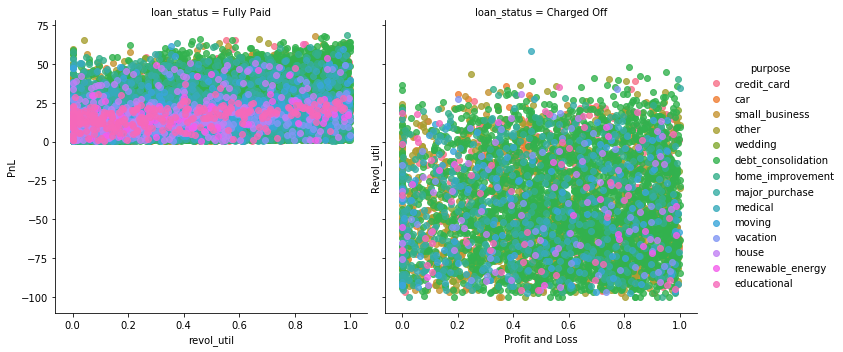

In [50]:
plt.figure(figsize=(15,45))


sns.lmplot(x='revol_util',y='PnL',col='loan_status',hue='purpose',fit_reg=False,data=loan_data_new)
plt.ylabel("Revol_util")
plt.xlabel("Profit and Loss")

plt.show()

In [51]:
# Profitibility vs %age default for employment length


D1=loan_data_new.groupby(['emp_length','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.emp_length.dropna().unique():
    default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['emp_length']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner')

print(D3.sort_values('default_rate'))

D4=loan_data_new.groupby(['emp_length','grade']).agg({'PnL':'median'})

median_profitability={}

for name in loan_data_new.emp_length.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

            median        mad  default_rate
emp_length                                 
9 years     14.375  15.030799          12.9
2 years     15.380  15.369247          13.2
3 years     15.025  15.589375          13.8
4 years     14.360  16.166513          13.8
8 years     13.920  15.244760          14.1
6 years     15.105  16.634692          14.2
< 1 year    14.380  16.049090          14.2
5 years     14.795  15.858263          14.3
1 year      14.980  16.250998          14.4
7 years     14.890  17.129002          15.4
10+ years   14.380  17.001842          15.7
   10+ years  < 1 year  3 years  8 years  9 years  4 years  5 years  1 year  \
A       9.95    10.410   10.180   10.455   10.035   10.520   10.175   10.43   
B      16.50    16.160   16.465   15.990   16.785   15.960   16.365   16.04   
C      20.85    20.125   20.500   20.070   20.750   20.860   20.850   20.28   
D      22.96    23.520   23.460   22.120   22.345   23.780   24.080   23.22   
E      27.20    26.010   26.090  

In [52]:
# Profitibility vs %age default for Purpose


D1=loan_data_new.groupby(['purpose','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.purpose.dropna().unique():
    default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['purpose']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_data_new.groupby(['purpose','grade']).agg({'PnL':'median'})
#print(D4)
median_profitability={}

for name in loan_data_new.purpose.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

                    median        mad  default_rate
purpose                                            
major_purchase      12.255  12.909845          10.3
wedding             15.200  13.647210          10.4
car                 12.390  12.225088          10.7
credit_card         15.080  12.707926          10.8
home_improvement    13.510  14.745096          12.1
vacation            12.440  14.866476          14.1
debt_consolidation  15.580  16.987734          15.3
medical             12.610  18.353759          15.6
moving              13.630  17.068547          16.0
house               12.580  17.312434          16.1
other               14.050  17.663163          16.4
educational         15.040  16.716205          17.2
renewable_energy    12.040  18.473449          18.6
small_business      13.140  27.200605          27.1
   credit_card     car  small_business   other  wedding  debt_consolidation  \
A       10.735   9.740          10.390  10.530    10.64              10.280   
B       16

In [54]:
D1=loan_data_new.groupby(['home_ownership','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.home_ownership.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['home_ownership']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_data_new.groupby(['home_ownership','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_data_new.home_ownership.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

                median        mad default_rate
home_ownership                                
MORTGAGE         13.80  15.585078         13.7
OWN              13.30  16.306254         14.9
RENT             15.54  16.993062         15.4
OTHER            15.10  17.482070         18.4
NONE             13.97   1.055556          NaT
    RENT     OWN  MORTGAGE  OTHER    NONE
A  10.48  10.170     9.990  12.78    12.4
B  16.16  16.085    16.280  15.54  14.765
C  20.54  20.100    20.730     20     NaT
D  23.52  21.720    23.220  23.02     NaT
E  26.29  27.280    26.930  19.19     NaT
F  27.15  22.840    28.950    0.3     NaT
G  29.71 -24.790    30.915    NaT     NaT


In [55]:
D1=loan_data_new.groupby(['addr_state','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.addr_state.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['addr_state']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_data_new.groupby(['addr_state','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_data_new.addr_state.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

            median        mad default_rate
addr_state                                
WY          16.770   9.343334            5
DC          15.970  10.993892          7.1
MS          17.500  14.312742         10.5
DE          15.960  14.351265         10.6
VT          13.830  14.917116         11.3
AR          13.790  13.851591         11.5
TN          15.240  11.130035         11.8
TX          15.010  14.308892         11.9
KS          14.310  14.546558         12.2
WV          16.260  15.188838         12.2
MA          14.170  14.284626         12.3
PA          14.425  14.378973         12.3
AL          15.010  13.936534         12.4
LA          14.620  13.836607         12.4
CO          14.275  14.393962         12.8
VA          14.620  14.185086         12.9
CT          14.310  15.168978         12.9
RI          13.890  13.831458         12.9
OH          15.440  15.966677         13.2
MT          12.690  15.262317         13.3
IL          15.395  15.273412         13.3
MN         

In [56]:
D1=loan_data_new.groupby(['verification_status','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.verification_status.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['verification_status']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_data_new.groupby(['verification_status','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_data_new.verification_status.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

                     median        mad  default_rate
verification_status                                 
Not Verified         13.860  14.185388          12.8
Source Verified      14.310  16.809369          14.8
Verified             16.095  18.820223          16.8
   Verified  Source Verified  Not Verified
A    10.410            9.830         10.36
B    16.520           16.160         16.14
C    20.960           20.755         20.07
D    23.470           23.980         22.74
E    26.665           27.280         26.01
F    28.705           29.725         26.26
G    29.640           29.160         25.83


In [57]:
#loan_data_new['delinq_2yrs']=loan_data_new['delinq_2yrs'].astype('category')
D1=loan_data_new.groupby(['delinq_2yrs','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

#print(D1)
# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.delinq_2yrs.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['delinq_2yrs']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_data_new.groupby(['delinq_2yrs','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_data_new.delinq_2yrs.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

             median        mad default_rate
delinq_2yrs                                
6            19.420  15.116400           10
5            21.400  16.176009         14.3
0            14.280  16.022047         14.4
1            17.420  17.945354         15.8
3            20.100  20.767530         16.5
2            18.050  20.026794         19.3
4            22.270  23.638444         21.7
7            24.805  43.492500           25
8           -28.195  43.675000           50
9            24.420   0.000000          NaT
11           17.420   0.000000          NaT
       0       2       3       1       4       6       5      8      7   \
A  10.240  11.030   9.875  10.870 -13.140     NaT     NaT    NaT    NaT   
B  16.160  15.880  13.660  16.400  18.050    9.22   11.79    NaT    NaT   
C  20.600  20.195  20.870  20.630  21.780   21.77    21.4    NaT  21.46   
D  23.455  21.800  22.805  23.205  23.520  16.115  25.325  15.48  28.15   
E  26.480  18.150  31.260  26.890  28.815    30.7    

In [60]:
drop_columns2=['installment','term','total_pymnt_inv','total_rec_prncp']

loan_data_new=loan_data_new.drop(drop_columns2,axis=1)

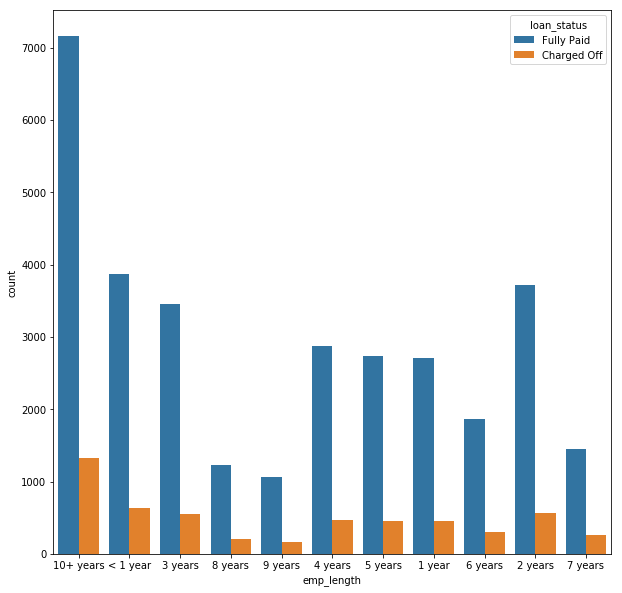

In [61]:
plt.figure(figsize=(10,10))
sns.countplot('emp_length',hue='loan_status',data=loan_data_new)
#sns.barplot(x='loan_status',y='funding_ratio',data=loan_data_new)
#sns.barplot(x='delinq_2yrs',y='loan_amnt',hue='loan_status',data=loan_data_new)
#sns.barplot(x='loan_status',y='install_inc_ratio',hue='home_ownership',data=loan_data_new[loan_data_new.home_ownership])
#fgrid=sns.lmplot(x='funded_amnt',y='funded_amnt_inv',col='loan_status',hue='grade',fit_reg=False,data=loan_data_new)
#ax=fgrid.axes[0][0]
#plt.xscale('log')
#plt.yscale('log')
#g=sns.pairplot(loan_data_new,vars=['loan_amnt','installment','annual_inc'],hue='loan_status')
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim((0,10e6))
plt.show()

In [62]:
# Converting employment length into a nominal variable
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0

    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

loan_data_new=loan_data_new.replace(mapping_dict)

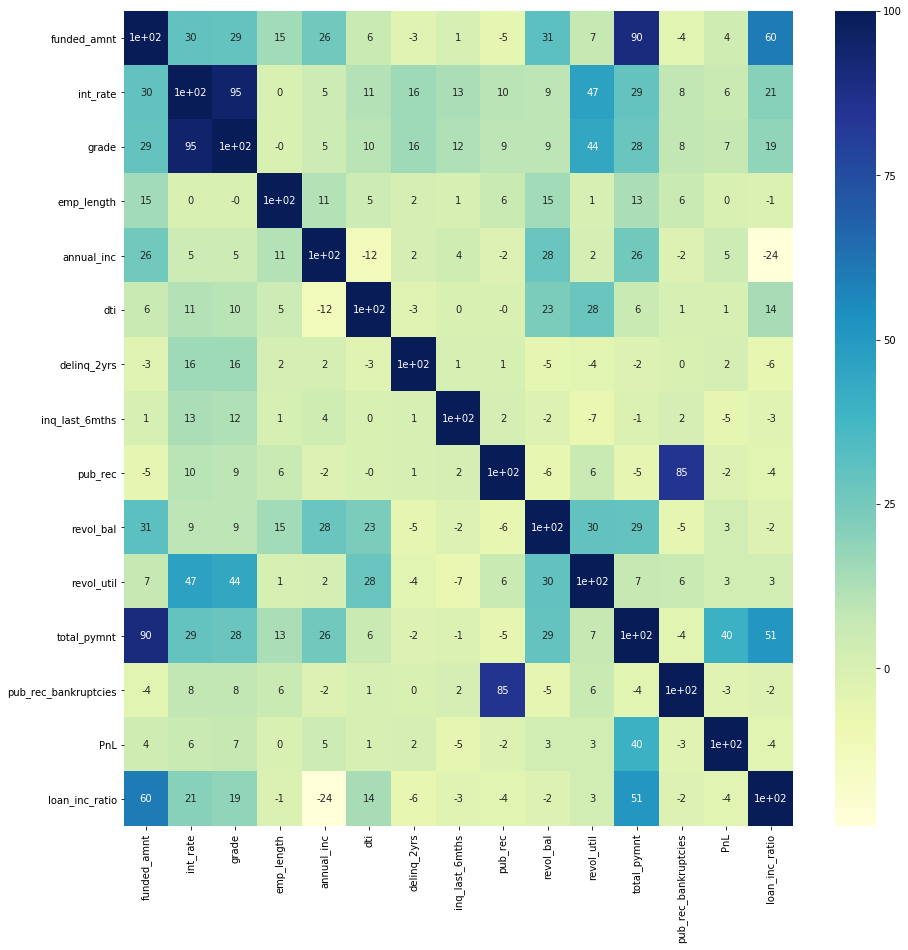

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(round(loan_data_new.corr()*100,0),annot=True,cmap="YlGnBu")
plt.show()

In [64]:
# Creating bins for DTI,loan amount, revol_util and seeing their influence of profitability
loan_data_new['funded_amnt_bins']=pd.cut(loan_data_new['funded_amnt'],7)
print(loan_data_new.groupby(['grade','funded_amnt_bins'])['PnL'].median())


loan_data_new['dti_bins']= pd.cut(loan_data_new['dti'],7)
print(loan_data_new.groupby(['grade','dti_bins'])['PnL'].median())


loan_data_new['revol_util_bins']= pd.cut(loan_data_new['revol_util'],7)
print(loan_data_new.groupby(['grade','revol_util_bins'])['PnL'].median())


grade  funded_amnt_bins      
1      (465.5, 5428.571]          9.810
       (5428.571, 10357.143]     10.380
       (10357.143, 15285.714]    10.310
       (15285.714, 20214.286]    10.760
       (20214.286, 25142.857]    10.970
       (25142.857, 30071.429]    11.255
       (30071.429, 35000.0]      12.350
2      (465.5, 5428.571]         16.080
       (5428.571, 10357.143]     16.150
       (10357.143, 15285.714]    16.420
       (15285.714, 20214.286]    16.770
       (20214.286, 25142.857]    16.320
       (25142.857, 30071.429]    17.260
       (30071.429, 35000.0]      16.490
3      (465.5, 5428.571]         20.480
       (5428.571, 10357.143]     20.480
       (10357.143, 15285.714]    20.650
       (15285.714, 20214.286]    20.810
       (20214.286, 25142.857]    20.850
       (25142.857, 30071.429]    24.590
       (30071.429, 35000.0]      21.130
4      (465.5, 5428.571]         23.220
       (5428.571, 10357.143]     23.220
       (10357.143, 15285.714]    23.760
       (15

<Figure size 3240x3240 with 0 Axes>

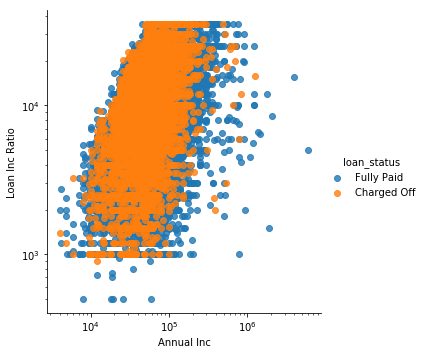

Index(['funded_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'revol_bal', 'revol_util', 'total_pymnt', 'pub_rec_bankruptcies', 'PnL',
       'loan_inc_ratio', 'funded_amnt_bins', 'dti_bins', 'revol_util_bins'],
      dtype='object')

In [69]:
# Look at public records, Debt to Income ratio, inquires in last months, revolving utilization, revolving utilization

loan_data_new.corr()
plt.figure(figsize=(45,45))


fgrid=sns.lmplot(y='funded_amnt',x='annual_inc',fit_reg=False,hue='loan_status',data=loan_data_new)
ax=fgrid.axes[0][0]
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Loan Inc Ratio")
plt.xlabel("Annual Inc")

plt.show()

loan_data_new.columns